In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np

In [41]:
df = pd.read_csv('crop_price_data.csv')

In [42]:
df.head()

,State,Crop,CostCultivation,CostCultivation2,Production,Yield,Temperature,RainFall Annual,Price
0,Uttar Pradesh,ARHAR,9794.05,9800.25,1941.55,9.83,28.96,3373.2,19589.10
1,Karnataka,ARHAR,10593.15,10594.15,2172.46,7.47,29.22,3520.7,21187.30
2,Gujarat,ARHAR,13468.82,13469.82,1898.30,9.59,28.47,2957.4,26938.64
3,Andhra Pradesh,ARHAR,17051.66,17052.66,3670.54,6.42,28.49,3079.6,34104.32
4,Maharashtra,ARHAR,17130.55,17131.55,2775.80,8.72,28.30,2566.7,34262.10


In [43]:
df.tail()

,State,Crop,CostCultivation,CostCultivation2,Production,Yield,Temperature,RainFall Annual,Price
44,Tamil Nadu,SUGARCANE,66335.06,66336.06,85.79,1015.45,28.97,2422.2,132671.12
45,Madhya Pradesh,WHEAT,12464.40,12465.40,810.25,23.59,29.37,3275.1,24929.80
46,Punjab,WHEAT,17945.58,17946.58,804.80,39.83,28.84,3079.9,35892.16
47,Uttar Pradesh,WHEAT,18979.38,18980.38,769.84,34.99,28.73,2721.9,37959.76
48,Rajasthan,WHEAT,19119.08,19120.08,683.58,37.19,28.89,3449.0,38239.16


In [44]:
df['Crop'].unique()

array(['ARHAR', 'COTTON', 'GRAM', 'GROUNDNUT', 'MAIZE', 'MOONG', 'PADDY',
       ' MUSTARD', 'SUGARCANE', 'WHEAT'], dtype=object)

In [45]:
df['State'].unique()

array(['Uttar Pradesh', 'Karnataka', 'Gujarat', 'Andhra Pradesh',
       'Maharashtra', 'Punjab', 'Haryana', 'Rajasthan', 'Madhya Pradesh',
       'Tamil Nadu', 'Bihar', 'Orissa', 'West Bengal'], dtype=object)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             49 non-null     object 
 1   Crop              49 non-null     object 
 2   CostCultivation   49 non-null     float64
 3   CostCultivation2  49 non-null     float64
 4   Production        49 non-null     float64
 5   Yield             49 non-null     float64
 6   Temperature       49 non-null     float64
 7   RainFall Annual   49 non-null     float64
 8   Price             49 non-null     float64
dtypes: float64(7), object(2)
memory usage: 3.6+ KB


In [47]:
df.shape

(49, 9)

In [49]:
#Feature Scaling and Target Variable
X = df[['State', 'Crop', 'CostCultivation', 'Production', 'Yield', 'Temperature', 'RainFall Annual']]
y = df['Price']

In [50]:
#One hot Encoding apply
X = pd.get_dummies(X, columns=['State','Crop'], drop_first=True)

In [51]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
#Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [53]:
y_pred = model.predict(X_test)

In [57]:
# Save the feature columns used for training
model_columns = X.columns.tolist()
with open('model_columns.pkl', 'wb') as f:
    pickle.dump(model_columns, f)


In [58]:
# Regression Report
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 4310.153779999993
Mean Squared Error (MSE): 54746643.582825795
Root Mean Squared Error (RMSE): 7399.097484344005
R² Score: 0.9525744570620398


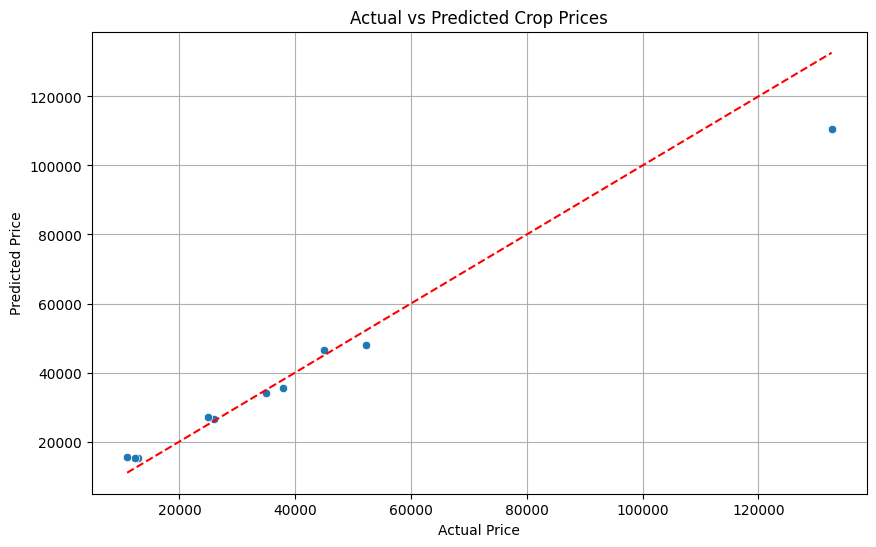

In [59]:
# Actual vs Predicted Prices
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Crop Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()

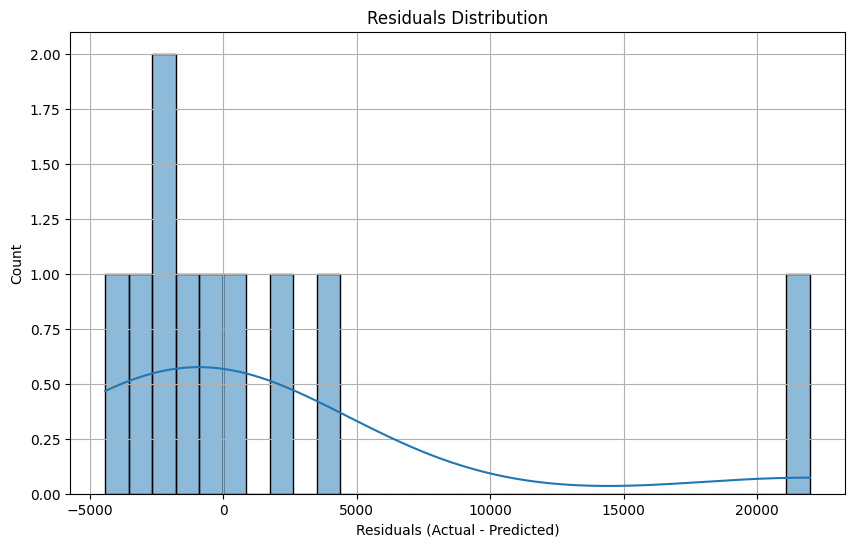

In [60]:
# Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()

In [61]:
with open('columns.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)